In [3]:
import pandas as pd

import sys
sys.path.append('/home/debiani/local_dev/reis-app/src/lib')

from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
import matplotlib.pyplot as plt

%matplotlib inline

## Load Dataframe

In [4]:
df_real = pd.read_excel('./ZBE-es.xlsx')
# Limpiar nombres de columnas
df_real.columns = df_real.columns.str.strip().str.replace(r"\s+", " ", regex=True)
# Eliminar espacios al principio y al final de las celdas de texto
df_real = df_real.map(lambda x: x.strip() if isinstance(x, str) else x)
df_real = df_real.dropna(axis=1, how='any')

## Embeddings

In [5]:
def plot_clusters(embeddings, cluster_assignment, ax, title):
    # Convertir las categorías a valores numéricos
    cluster_assignment_numeric = pd.Categorical(cluster_assignment).codes
    cluster_names = pd.Categorical(cluster_assignment).categories

    # Reducir dimensiones con UMAP
    reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
    reduced_embeds = reducer.fit_transform(embeddings)

    # Crear scatter plot en el subplot actual
    scatter = ax.scatter(reduced_embeds[:, 0], reduced_embeds[:, 1],
                         c=cluster_assignment_numeric, cmap='Spectral', s=10)
    ax.set_title(title)

    # Agregar leyenda para los nombres de los clusters
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=5)
               for i in range(len(cluster_names))]
    ax.legend(handles, cluster_names, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/inaqui/localdev/reis-app/src/lib/report/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


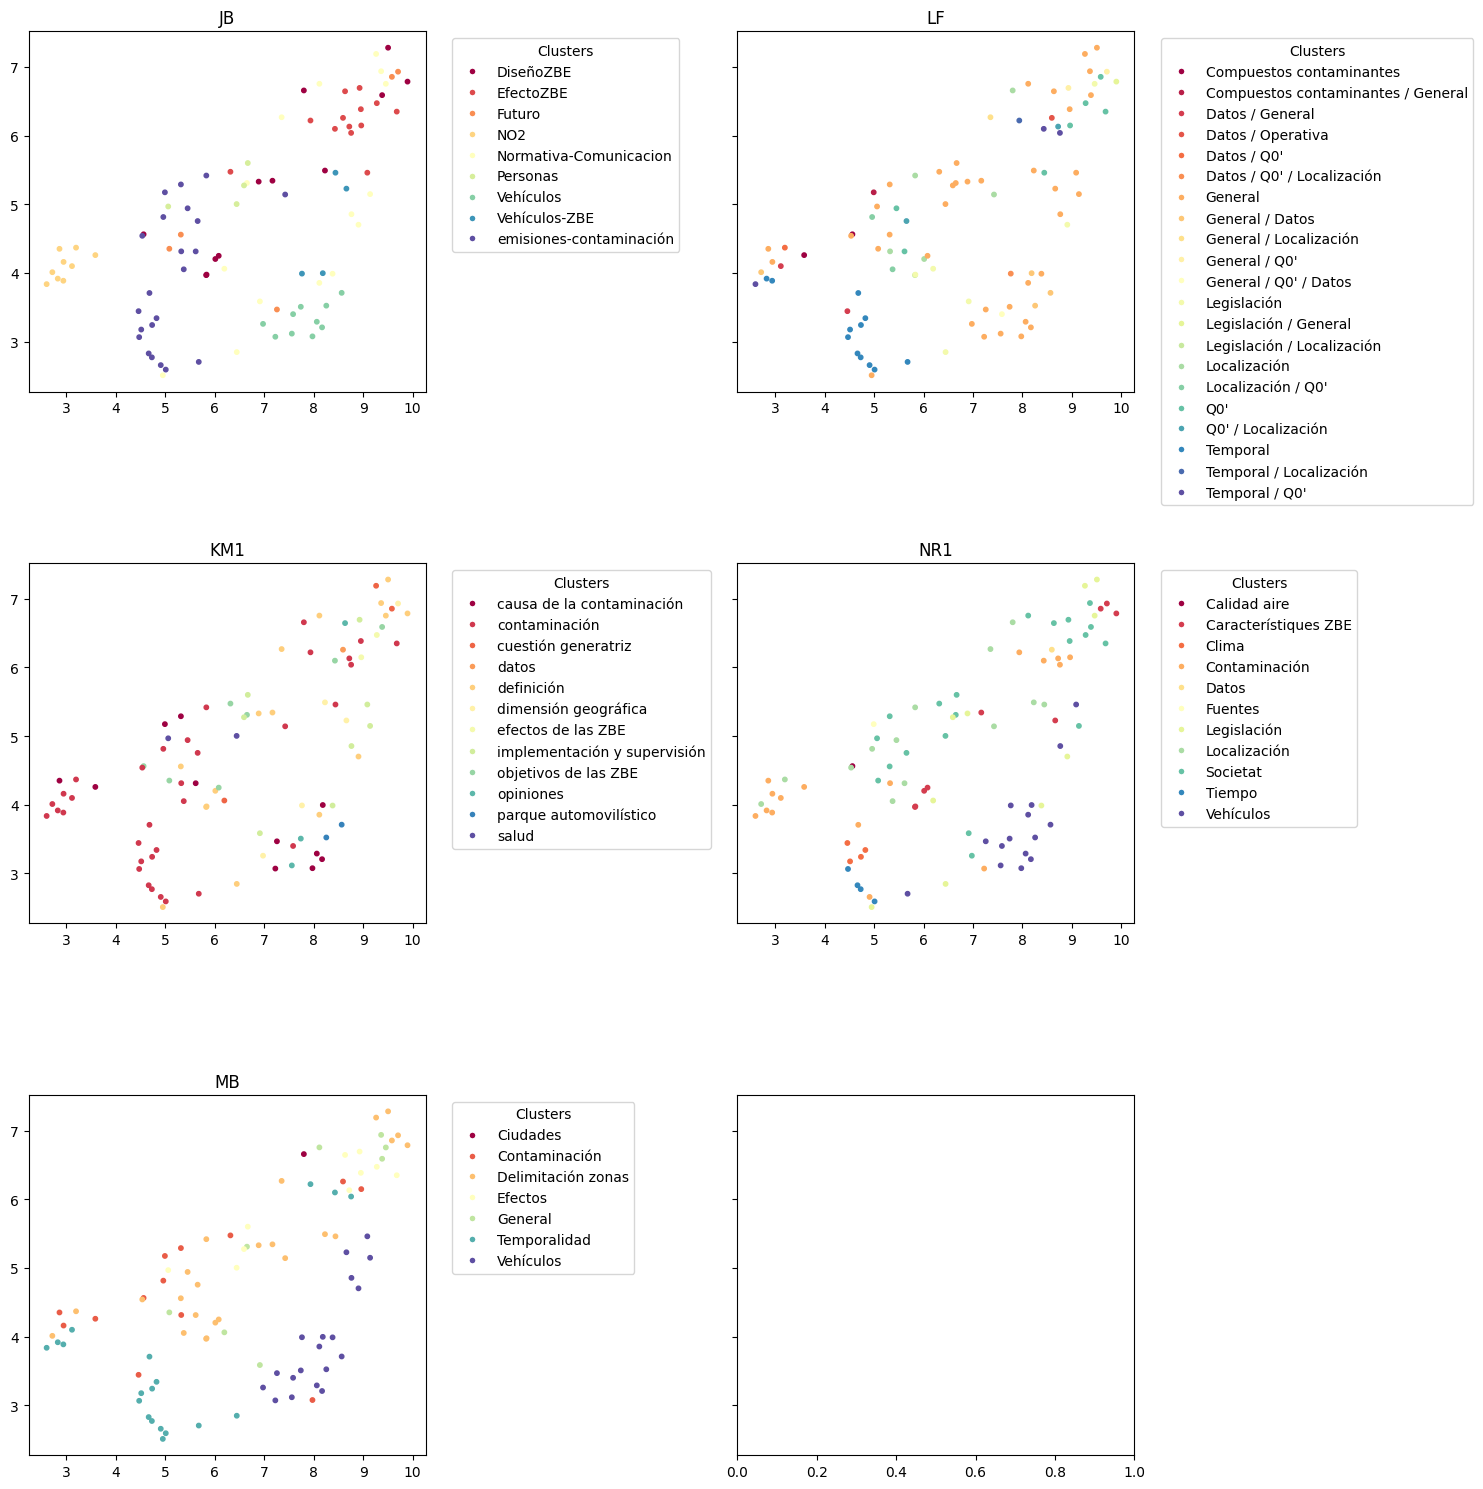

In [ ]:
cols = ['JB', 'LF', 'KM1', 'NR1', 'MB']

# Configurar los subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

embedder_model = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
model = SentenceTransformer(embedder_model)

for i, col in enumerate(cols):
    ax = axes[i]
    embeddings = model.encode(df_real['Question'].tolist(), show_progress_bar=True, device='cuda')
    
    plot_clusters(
        embeddings,
        cluster_assignment=df_real[col].tolist(),
        ax=ax,
        title=col
    )

plt.tight_layout()
plt.show()